In [1]:
lamanno_dir = "/nfs/leia/research/stegle/dseaton/data/scrnaseq_datasets/lemanno2016_mouse_human_DAneuron/"

In [2]:
list.files(lamanno_dir)

[1] "create_scanpy_object.py"                               
 [2] "GSE76381_EmbryoMoleculeCounts.cef.txt"                 
 [3] "GSE76381_EmbryoMoleculeCounts.cef.txt.h5ad"            
 [4] "GSE76381_ESMoleculeCounts.cef.txt"                     
 [5] "GSE76381_ESMoleculeCounts.cef.txt.h5ad"                
 [6] "GSE76381_iPSMoleculeCounts.cef.txt"                    
 [7] "GSE76381_iPSMoleculeCounts.cef.txt.h5ad"               
 [8] "lemanno2016_human_embryo_brain_markers.tsv"            
 [9] "lemanno2016_midbrain_celltype_marker_binary_matrix.csv"
[10] "parse_cell_type_marker_table.py"                       
[11] "table_S2_cell_type_markers.xlsx"

In [3]:
filename = paste0(lamanno_dir, 'GSE76381_iPSMoleculeCounts.cef.txt')
df = read.csv(filename, sep = "\t")

In [4]:
head(df)

CEF,X0,X1,X3,X14726,X337,X0.1,X,X.1,X.2,...,X.322,X.323,X.324,X.325,X.326,X.327,X.328,X.329,X.330,X.331
,Cell_ID,1772099-259_E02,1772116-063_D07,1772116-060_E02,1772116-063_E05,1772099-259_C09,1772116-060_A08,1772099-259_F01,1772099-258_H10,...,1772099-240_C03,1772099-260_C03,1772099-238_E12,1772116-063_A09,1772099-260_C06,1772099-238_C01,1772099-240_F07,1772099-241_G09,1772116-063_G02,1772099-259_H03
,Cell_type,iMN2,iMN2,iMN2,iMN2,iMN2,iMN2,iMN2,iMN2,...,iDAc,iDAc,iDAc,iDAc,iDAc,iDAc,iDAc,iDAc,iDAc,iDAc
,Timepoint,day_63,day_42,day_42,day_42,day_63,day_42,day_63,day_63,...,day_63,day_63,day_63,day_42,day_63,day_63,day_63,day_63,day_42,day_63
Gene,,,,,,,,,,...,,,,,,,,,,
WASH7P_p1,,0,0,0,0,0,0,0,0,...,1,2,0,1,0,0,0,0,0,0
LINC01002_loc4,,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
meta_df = as.data.frame(t(df[1:3,3:ncol(df)]))
colnames(meta_df) = df[1:3,2]
rownames(meta_df) = meta_df$Cell_ID
head(meta_df)

,Cell_ID,Cell_type,Timepoint
1772099-259_E02,1772099-259_E02,iMN2,day_63
1772116-063_D07,1772116-063_D07,iMN2,day_42
1772116-060_E02,1772116-060_E02,iMN2,day_42
1772116-063_E05,1772116-063_E05,iMN2,day_42
1772099-259_C09,1772099-259_C09,iMN2,day_63
1772116-060_A08,1772116-060_A08,iMN2,day_42


In [6]:
inner_df = df[5:nrow(df),3:ncol(df)]

In [7]:
nrow(inner_df)
ncol(inner_df)

[1] 14726

[1] 337

In [8]:
counts_df = matrix(0, nrow = nrow(inner_df), ncol = ncol(inner_df))
for (i in 1:ncol(inner_df)){
    counts_df[,i] = as.numeric(as.character(unlist(inner_df[,i])))
}

In [9]:
counts_df[1:5,1:5]
str(counts_df)

0,0,0,0,0
0,0,0,0,0
0,1,0,0,1
0,0,0,0,1
0,0,1,0,0


 num [1:14726, 1:337] 0 0 0 0 0 0 0 0 0 0 ...


In [10]:
rownames(counts_df) = df[5:nrow(df),1]
colnames(counts_df) = meta_df$Cell_ID
counts_df[1:5,1:5]

,1772099-259_E02,1772116-063_D07,1772116-060_E02,1772116-063_E05,1772099-259_C09
WASH7P_p1,0,0,0,0,0
LINC01002_loc4,0,0,0,0,0
LOC100133331_loc1,0,1,0,0,1
LOC101928626,0,0,0,0,1
MIR6723,0,0,1,0,0


In [11]:
min(counts_df)
max(counts_df)

[1] 0

[1] 652

In [13]:
library(SingleCellExperiment)

In [15]:
sce_lamanno <- SingleCellExperiment(
assays = list(counts = counts_df),
colData = meta_df)
sce_lamanno

class: SingleCellExperiment 
dim: 14726 337 
metadata(0):
assays(1): counts
rownames(14726): WASH7P_p1 LINC01002_loc4 ... SPRY3_loc2 VAMP7_loc1
rowData names(0):
colnames(337): 1772099-259_E02 1772116-063_D07 ... 1772116-063_G02
  1772099-259_H03
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [16]:
saveRDS(sce_lamanno, "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_ips.Rds")

In [1]:
LM = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/sce_lamanno_ips.Rds")

In [32]:
LM

class: SingleCellExperiment 
dim: 14726 337 
metadata(0):
assays(2): counts logcounts
rownames(14726): WASH7P_p1 LINC01002_loc4 ... SPRY3_loc2 VAMP7_loc1
rowData names(0):
colnames(337): 1772099-259_E02 1772116-063_D07 ... 1772116-063_G02
  1772099-259_H03
colData names(3): Cell_ID Cell_type Timepoint
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [3]:
str(counts(LM))

 num [1:14726, 1:337] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:14726] "WASH7P_p1" "LINC01002_loc4" "LOC100133331_loc1" "LOC101928626" ...
  ..$ : chr [1:337] "1772099-259_E02" "1772116-063_D07" "1772116-060_E02" "1772116-063_E05" ...


In [4]:
counts(LM)[1:5,1:5]

,1772099-259_E02,1772116-063_D07,1772116-060_E02,1772116-063_E05,1772099-259_C09
WASH7P_p1,0,0,0,0,0
LINC01002_loc4,0,0,0,0,0
LOC100133331_loc1,0,1,0,0,1
LOC101928626,0,0,0,0,1
MIR6723,0,0,1,0,0


In [5]:
LM <- scater::logNormCounts(LM, log=T)
alt.fit2 <- scran::trendVar(LM, use.spikes = FALSE)
alt.decomp2 <- scran::decomposeVar(LM, alt.fit2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [6]:
genes_LM = rownames(alt.decomp2[order(alt.decomp2$bio, decreasing = TRUE),][1:2000,])

In [7]:
length(genes_LM)

[1] 2000

In [8]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/in_vivo_comparison/"

In [9]:
neuroseq_filename = paste0(mydir,"neuroseq_all_25pct_sce.Rds")
neuroseq = readRDS(neuroseq_filename)

In [10]:
# neuroseq = neuroseq[,neuroseq$celltype %in% c('DA','Sert','CHem')]

In [11]:
neuroseq <- scater::logNormCounts(neuroseq, log=T)
design <- model.matrix(~pool_id, data = colData(neuroseq))
alt.fit <- scran::trendVar(neuroseq, design = design, use.spikes = FALSE)
alt.decomp <- scran::decomposeVar(neuroseq, alt.fit)

Warning message:
“'trendVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'decomposeVar' is deprecated.
Use 'modelGeneVar' instead.
See help("Deprecated")”Warning message:
“'testVar' is deprecated.
See help("Deprecated")”

In [12]:
genes_neuroseq = rownames(alt.decomp[order(alt.decomp$bio, decreasing = TRUE),][1:2000,])

In [13]:
all_genes = unique(c(genes_LM,genes_neuroseq))

In [14]:
genes_n = rownames(neuroseq)[rownames(neuroseq) %in% all_genes]
common_genes = rownames(LM)[rownames(LM) %in% genes_n]

In [16]:
common_genes

[1] "SAMD11"         "HES4"           "ISG15"          "ACAP3"         
   [5] "CCNL2"          "MRPL20"         "SLC35E2B"       "LRRC47"        
   [9] "CHD5"           "ACOT7"          "PLEKHG5"        "UTS2"          
  [13] "RERE"           "ENO1"           "CLSTN1"         "CTNNBIP1"      
  [17] "KIF1B"          "DFFA"           "FBXO2"          "DRAXIN"        
  [21] "MFAP2"          "ATP13A2"        "RCC2"           "IGSF21"        
  [25] "UBR4"           "EMC1"           "CAPZB"          "MINOS1"        
  [29] "CAMK2N1"        "MUL1"           "DDOST"          "HP1BP3"        
  [33] "EIF4G3"         "CDC42"          "WNT4"           "ID3"           
  [37] "PITHD1"         "SYF2"           "PAQR7"          "STMN1"         
  [41] "SH3BGRL3"       "UBXN11"         "LIN28A"         "HMGN2"         
  [45] "NUDC"           "IFI6"           "FAM76A"         "EYA3"          
  [49] "ATPIF1"         "TAF12"          "EPB41"          "SRSF4"         
  [53] "SDC3"           "PUM1"           "FABP3"          "BAI2"          
  [57] "PTP4A2"         "KHDRBS1"        "CCDC28B"        "MARCKSL1"      
  [61] "BSDC1"          "ZBTB8OS"        "SYNC"           "YARS"          
  [65] "AK2"            "PHC2"           "SFPQ"           "KIAA0319L"     
  [69] "PSMB2"          "C1orf216"       "CLSPN"          "TEKT2"         
  [73] "STK40"          "MRPS15"         "MEAF6"          "DNALI1"        
  [77] "C1orf122"       "SF3A3"          "POU3F1"         "RRAGC"         
  [81] "MACF1"          "HPCAL4"         "PPT1"           "COL9A2"        
  [85] "RIMS3"          "SCMH1"          "FOXJ3"          "CCDC23"        
  [89] "SLC2A1"         "ATP6V0B"        "PRDX1"          "NASP"          
  [93] "PIK3R3"         "TSPAN1"         "POMGNT1"        "LRRC41"        
  [97] "BEND5"          "ELAVL4"         "DMRTA2"         "RNF11"         
 [101] "EPS15"          "RAB3B"          "TXNDC12"        "ZCCHC11"       
 [105] "C1orf123"       "LRP8"           "HSPB11"         "TMEM59"        
 [109] "SSBP3"          "DHCR24"         "USP24"          "MYSM1"         
 [113] "JUN"            "NFIA"           "DOCK7"          "JAK1"          
 [117] "TCTEX1D1"       "SERBP1"         "GADD45A"        "DIRAS3"        
 [121] "WLS"            "LRRC40"         "NEGR1"          "USP33"         
 [125] "IFI44L"         "PRKACB"         "GNG5"           "SSX2IP"        
 [129] "C1orf52"        "DDAH1"          "CYR61"          "ODF2L"         
 [133] "SH3GLB1"        "SEP15"          "HS2ST1"         "LMO4"          
 [137] "GTF2B"          "ZNF644"         "KIAA1107"       "FNBP1L"        
 [141] "ARHGAP29"       "CNN3"           "PTBP2"          "LPPR5"         
 [145] "DBT"            "SLC30A7"        "OLFM3"          "NTNG1"         
 [149] "WDR47"          "C1orf194"       "PSRC1"          "SORT1"         
 [153] "PSMA5"          "GSTM3"          "LAMTOR5"        "PIFO"          
 [157] "WNT2B"          "ST7L"           "CAPZA1"         "RHOC"          
 [161] "PHTF1"          "RSBN1"          "TRIM33"         "BCAS2"         
 [165] "SIKE1"          "TSPAN2"         "NHLH2"          "IGSF3"         
 [169] "ZNF697"         "PHGDH"          "TXNIP"          "POLR3GL"       
 [173] "HIST2H2BE"      "SV2A"           "ANP32E"         "CA14"          
 [177] "C1orf54"        "MCL1"           "ENSA"           "C1orf56"       
 [181] "CDC42SE1"       "MLLT11"         "SEMA6C"         "LYSMD1"        
 [185] "POGZ"           "CELF3"          "S100A10"        "S100A11"       
 [189] "S100A6"         "S100A13"        "ILF2"           "DENND4B"       
 [193] "SLC39A1"        "JTB"            "ADAR"           "PBXIP1"        
 [197] "CKS1B"          "DPM3"           "KRTCAP2"        "FDPS"          
 [201] "YY1AP1"         "SYT11"          "SSR2"           "UBQLN4"        
 [205] "MEX3A"          "LMNA"           "CCT3"           "MEF2D"         
 [209] "APOA1BP"        "NES"            "CRABP2"         "ARHGEF11"      
 [213] "CADM3"          "TAG

In [33]:
length(common_genes)

[1] 3087

In [15]:
query = neuroseq[common_genes,]
reference = LM[common_genes,]

In [17]:
query$batch_factor = "query"
reference$batch_factor = "reference"

In [18]:
getJointPCA = function(reference, query, 
                       assayNameRef = "logcounts",
                       assayNameQuery = "logcounts") {
# reference and query are SingleCellExperiment objects
  all_assay = cbind(assay(query, assayNameQuery),
                    assay(reference, assayNameRef))
# batch factors can be dataset specific batches or just a factor labelling i.e. "query", "reference" 
#   batchFactor = factor(c(as.character(query$sample_id),
#                            as.character(reference$dataset)))
 batchFactor = factor(c(as.character(query$batch_factor),
                           as.character(reference$batch_factor)))
#   print(table(batchFactor))
  mbpca = batchelor::multiBatchPCA(all_assay,
                        batch = batchFactor,
                        d = 50
                        # BPPARAM = BiocParallel::MulticoreParam(workers = 4)
  )
  print("done multibatch PCA")
  dim(mbpca[[1]])
  out = do.call(batchelor::reducedMNN, mbpca)
  print("done batch correction")
  joint_mnn_pca = out$corrected
  return(joint_mnn_pca)
}

In [19]:
joint_mnn_pca = getJointPCA(reference, query)

Warning message in sweep(centered, 2, w, "/", check.margin = FALSE):
“'check.margin' is ignored when 'x' is a DelayedArray object or
  derivative”

[1] "done multibatch PCA"
[1] "done batch correction"


In [20]:
df_pca = as.data.frame(joint_mnn_pca[,c(1:2)])
colnames(df_pca) = paste0("PC",1:2)
head(df_pca)

,PC1,PC2
TTCCCAGGTTCCATGA-1-0,-25.56702,17.78914
AACCGCGAGGTCATCT-1-0,-25.55047,15.47579
TCACAAGTCTTATCTG-1-0,-25.19180,17.39611
TACCTTACACGGTTTA-1-0,-22.93044,18.60790
CCTAGCTAGCGCCTTG-1-0,-25.54036,15.55650
CAAGATCAGGCTCTTA-1-0,-25.45470,14.25534


In [21]:
mat = matrix(0, nrow = length(unique(query$celltype)), ncol = length(unique(reference$Cell_type)))
nrow(mat)
ncol(mat)

[1] 11

[1] 13

In [22]:
rownames(mat) = unique(query$celltype)
colnames(mat) = unique(reference$Cell_type)

In [23]:
i = 0
for (celltype in unique(query$celltype)){
#     print(celltype)
    j = 0
    i = i+1
    sel_cells = colnames(query[,query$celltype == celltype])
    closest_atlas_cell_ind = BiocNeighbors::queryKNN(
        joint_mnn_pca[colnames(reference),],
        joint_mnn_pca[sel_cells,],
        k = 2, get.index = TRUE, get.distance = FALSE)
    mapped_cells = colnames(reference)[closest_atlas_cell_ind$index]
    for (cluster in unique(reference$Cell_type)){
#         print(cluster)
        j = j+1
        n = length(mapped_cells[mapped_cells %in% colnames(reference[,reference$Cell_type == cluster])])
        mat[i,j] = n/length(mapped_cells)
#         print(mat[i,j])
    }
}

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning messa

In [24]:
mat

,iMN2,iRN,iNb2,iMN1,iProg2,iProg3,iRgl1,iProg1,iRgl2,iDAa,iNb1,iDAb,iDAc
FPP,0.0002858563,0.000000e+00,0.0006587124,0.0081282625,0.005456127,0.0013919960,0.59414616,1.242854e-05,0.389796172,0.000000e+00,0.000000e+00,0.0001242854,0.000000e+00
P_FPP,0.0003962488,0.000000e+00,0.0105171047,0.0218432175,0.011970017,0.0037808744,0.85033351,9.906221e-05,0.100416061,2.641659e-04,0.000000e+00,0.0003302074,4.953111e-05
NB,0.1710009814,0.000000e+00,0.0024533857,0.0466143278,0.031157998,0.0051521099,0.55912659,0.000000e+00,0.184003925,0.000000e+00,0.000000e+00,0.0002453386,2.453386e-04
Sert,0.0528065794,0.000000e+00,0.0274143640,0.0944845557,0.163006894,0.0091471690,0.36470604,1.017860e-03,0.233429238,5.795017e-03,3.168938e-02,0.0162043320,2.985723e-04
DA,0.1111372102,3.939465e-02,0.0437569209,0.2435153183,0.157243046,0.0228683601,0.00765075,6.274957e-03,0.017113520,2.515016e-02,3.573706e-03,0.3117848394,1.053656e-02
CHem,0.0256823351,5.847233e-02,0.0989385898,0.2332733131,0.100786581,0.0102350265,0.02824109,1.032980e-02,0.006823351,5.923048e-02,6.633813e-04,0.3665181956,8.055345e-04
unknown,0.2313019391,1.385042e-03,0.0512465374,0.0966759003,0.123822715,0.0049861496,0.18005540,6.648199e-03,0.149030471,2.354571e-02,2.520776e-02,0.1060941828,0.000000e+00
Astro,0.0007158321,1.745932e-05,0.0028109505,0.0284412319,0.017895803,0.0031950555,0.71649557,2.444305e-04,0.228926601,0.000000e+00,0.000000e+00,0.0012570710,0.000000e+00
Epen1,0.0002290617,4.164758e-05,0.0006038899,0.0017075507,0.020219899,0.0009995419,0.68512349,0.000000e+00,0.290325268,8.329516e-05,2.082379e-05,0.0006455375,0.000000e+00
P_Sert,0.0346153846,0.000000e+00,0.0048076923,0.0096153846,0.229807692,0.0019230769,0.50096154,0.000000e+00,0.212500000,0.000000e+00,0.000000e+00,0.0057692308,0.000000e+00


In [25]:
library(reshape2)
mat_melt = melt(mat)
head(mat_melt)

Var1,Var2,value
FPP,iMN2,0.0002858563
P_FPP,iMN2,0.0003962488
NB,iMN2,0.1710009814
Sert,iMN2,0.0528065794
DA,iMN2,0.1111372102
CHem,iMN2,0.0256823351


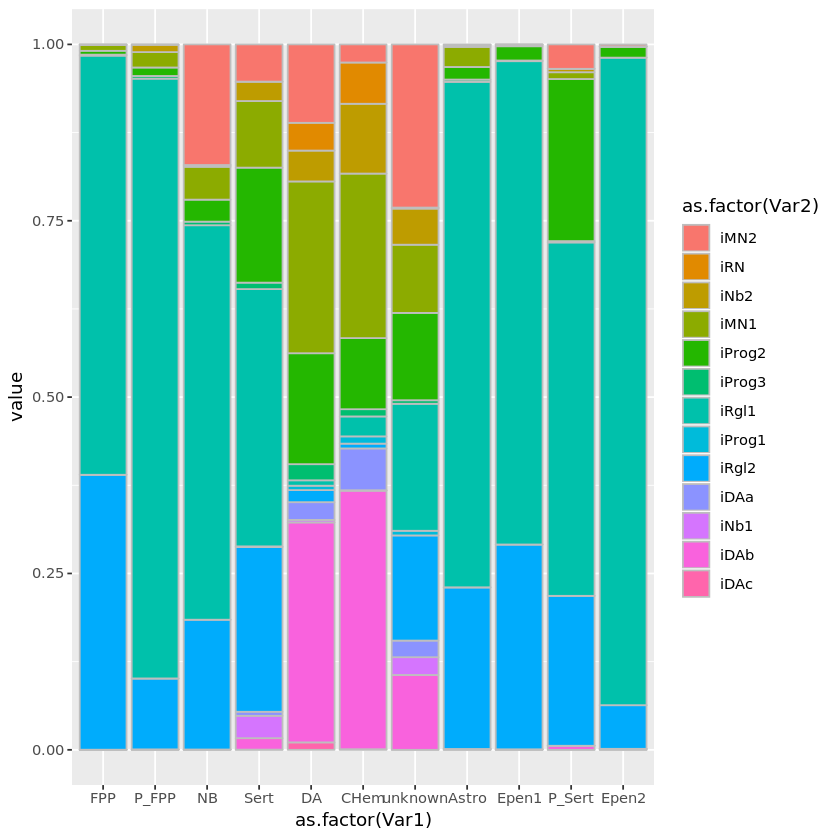

In [26]:
library(ggplot2)
df = as.data.frame(mat_melt)
ggplot(df, aes(x = as.factor(Var1), y = value, fill = as.factor(Var2))) + geom_bar(stat="identity", col = "grey")

In [57]:
sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA'])
sel_cells = colnames(neuroseq[,neuroseq$celltype == 'DA' & neuroseq$time_point == 'D52' & 
                             neuroseq$treatment == 'ROT'])

Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”Warning message in NSBS(i, x, exact = exact, strict.upper.bound = !allow.append, :
“subscript is an array, passing it thru as.vector() first”

In [58]:
closest_atlas_cell_ind = BiocNeighbors::queryKNN(
    joint_mnn_pca[colnames(LM),],
    joint_mnn_pca[sel_cells,],
  k = 1, get.index = TRUE, get.distance = FALSE)

In [59]:
mapped_cells = colnames(LM)[closest_atlas_cell_ind$index]

In [60]:
df = as.data.frame(colData(LM))

In [61]:
df_mapped = df[mapped_cells,]
head(df_mapped,2)
# unique(df_mapped$Cell_type)
nrow(df_mapped)
nrow(df_mapped[df_mapped$Timepoint == "day_42",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Timepoint == "day_63",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iDAa",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iDAb",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iMN1",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iProg2",])/nrow(df_mapped)
nrow(df_mapped[df_mapped$Cell_type == "iMN2",])/nrow(df_mapped)

,Cell_ID,Cell_type,Timepoint
1772116-060_A05,1772116-060_A05,iDAb,day_42
1772116-060_A05.1,1772116-060_A05,iDAb,day_42


[1] 5055

[1] 0.7275964

[1] 0.2724036

[1] 0

[1] 0.4591494

[1] 0.1064293

[1] 0.1052423

[1] 0.2581602